<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EEG-Signal" data-toc-modified-id="EEG-Signal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EEG Signal</a></span></li><li><span><a href="#Single-channel" data-toc-modified-id="Single-channel-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Single channel</a></span></li><li><span><a href="#Cross-channel" data-toc-modified-id="Cross-channel-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cross-channel</a></span></li></ul></div>

## EEG Signal

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import spkit as sp
from spkit.data import load_data
print(sp.__version__)

0.0.9.2


In [34]:
X,ch_names = load_data.eegSample()
t = np.arange(X.shape[0])/128
nC = len(ch_names)
print(X.shape)
print(ch_names)

(2048, 14)
['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']


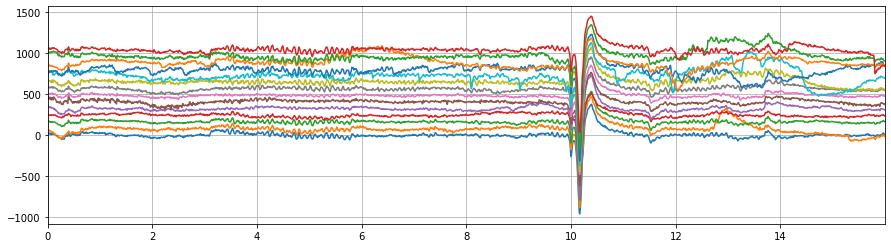

In [35]:
plt.figure(figsize=(15,4))
plt.plot(t,X+np.arange(nC)*80)
plt.grid()
plt.xlim(t[0],t[-1])
plt.show()

## Single channel

In [3]:
x1 =X[:,0] #'AF3' - Frontal Lobe
x2 =X[:,6] #'O1'  - Occipital Lobe
#Shannan entropy
H_x1= sp.entropy(x1,alpha=1)
H_x2= sp.entropy(x2,alpha=1)

#Rényi entropy
Hr_x1= sp.entropy(x1,alpha=2)
Hr_x2= sp.entropy(x2,alpha=2)

#Joint entropy
H_x12= sp.entropy_joint(x1,x2)

#Conditional Entropy
H_x12= sp.entropy_cond(x1,x2)
H_x21= sp.entropy_cond(x2,x1)

#Mutual Information
I_x12 = sp.mutual_Info(x1,x2)

#Cross Entropy
H_x12_cross= sp.entropy_cross(x1,x2)

#Diff Entropy
D_x12= sp.entropy_kld(x1,x2)


print('Shannan entropy')
print('Entropy of x1: H(x1) =\t ',H_x1)
print('Entropy of x2: H(x2) =\t ',H_x2)
print('-')
print('Rényi entropy')
print('Entropy of x1: H(x1) =\t ',Hr_x1)
print('Entropy of x2: H(x2) =\t ',Hr_x2)
print('-')
print('Joint Entropy H(x1,x2) =\t',H_x12)
print('Mutual Information I(x1,x2) =\t',I_x12)
print('Conditional Entropy of : H(x1|x2) =\t',H_x12)
print('Conditional Entropy of : H(x2|x1) =\t',H_x21)
print('-')
print('Cross Entropy of : H(x1,x2) =\t',H_x12_cross)
print('Kullback–Leibler divergence : Dkl(x1,x2) =\t',D_x12)

Shannan entropy
Entropy of x1: H(x1) =	  4.811416424350645
Entropy of x2: H(x2) =	  4.697278111823318
-
Rényi entropy
Entropy of x1: H(x1) =	  4.239955818998481
Entropy of x2: H(x2) =	  4.145472461333239
-
Joint Entropy H(x1,x2) =	 3.655513859907648
Mutual Information I(x1,x2) =	 1.1559025644429965
Conditional Entropy of : H(x1|x2) =	 3.655513859907648
Conditional Entropy of : H(x2|x1) =	 3.541375547380321
-
Cross Entropy of : H(x1,x2) =	 5.686498222841184
Kullback–Leibler divergence : Dkl(x1,x2) =	 0.7202757885313226


In [10]:
H_X= [sp.entropy(x,alpha=1) for x in X.T]

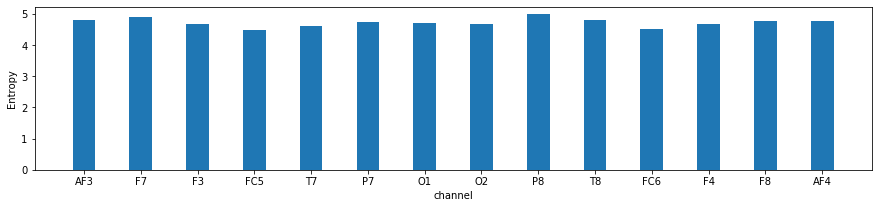

In [11]:
plt.figure(figsize=(15,3))
plt.bar(np.arange(nC)*2,H_X)
plt.xticks(np.arange(nC)*2,ch_names)
plt.ylabel('Entropy')
plt.xlabel('channel')
plt.show()

## Cross-channel

In [15]:
MI = np.zeros([nC,nC])
JE = np.zeros([nC,nC])
CE = np.zeros([nC,nC])
KL = np.zeros([nC,nC])
for i in range(nC):
    x1 = X[:,i]
    for j in range(nC):  
        x2 = X[:,j]
        
        #Mutual Information
        MI[i,j] = sp.mutual_Info(x1,x2)
        
        #Joint entropy
        JE[i,j]= sp.entropy_joint(x1,x2)
        
        #Cross Entropy
        CE[i,j]= sp.entropy_cross(x1,x2)
        
        #Diff Entropy
        KL[i,j]= sp.entropy_kld(x1,x2)

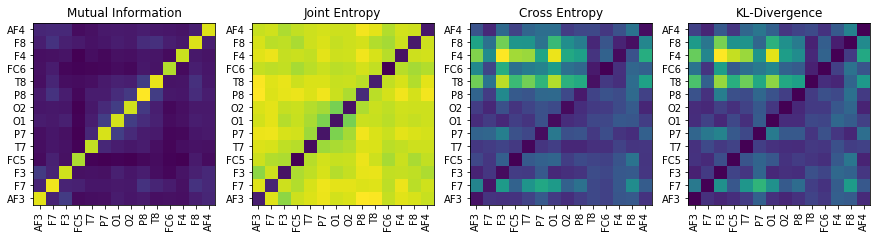

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(MI,origin='lower')
plt.yticks(np.arange(nC),ch_names)
plt.xticks(np.arange(nC),ch_names,rotation=90)
plt.title('Mutual Information')
plt.subplot(142)
plt.imshow(JE,origin='lower')
plt.yticks(np.arange(nC),ch_names)
plt.xticks(np.arange(nC),ch_names,rotation=90)
plt.title('Joint Entropy')
plt.subplot(143)
plt.imshow(CE,origin='lower')
plt.yticks(np.arange(nC),ch_names)
plt.xticks(np.arange(nC),ch_names,rotation=90)
plt.title('Cross Entropy')
plt.subplot(144)
plt.imshow(KL,origin='lower')
plt.yticks(np.arange(nC),ch_names)
plt.xticks(np.arange(nC),ch_names,rotation=90)
plt.title('KL-Divergence')
plt.show()

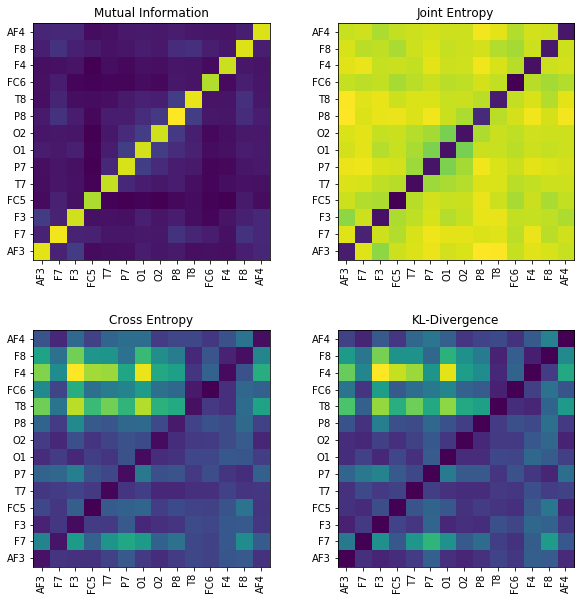

In [47]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(MI,origin='lower')
plt.yticks(np.arange(nC),ch_names)
plt.xticks(np.arange(nC),ch_names,rotation=90)
plt.title('Mutual Information')
plt.subplot(222)
plt.imshow(JE,origin='lower')
plt.yticks(np.arange(nC),ch_names)
plt.xticks(np.arange(nC),ch_names,rotation=90)
plt.title('Joint Entropy')
plt.subplot(223)
plt.imshow(CE,origin='lower')
plt.yticks(np.arange(nC),ch_names)
plt.xticks(np.arange(nC),ch_names,rotation=90)
plt.title('Cross Entropy')
plt.subplot(224)
plt.imshow(KL,origin='lower')
plt.yticks(np.arange(nC),ch_names)
plt.xticks(np.arange(nC),ch_names,rotation=90)
plt.title('KL-Divergence')
plt.subplots_adjust(hspace=0.3)
plt.show()